# L0: What is RL?

## 1. State

State: complete description of the state of the world (no hidden information), ex. chess;

Observation: a partial decription of the state of the world, ex. super Mario Bros.

## 2. Action

Discrete: finite numbers os possible actions, ex. super Mario Bros;

Continuous: infinite number of possible actions, ex. self driving car since it can turn left $20\degree$, $20.1\degree$, $20.11\degree$, $\dots$

## 3. Reward

Discounted expected cumulative reward:

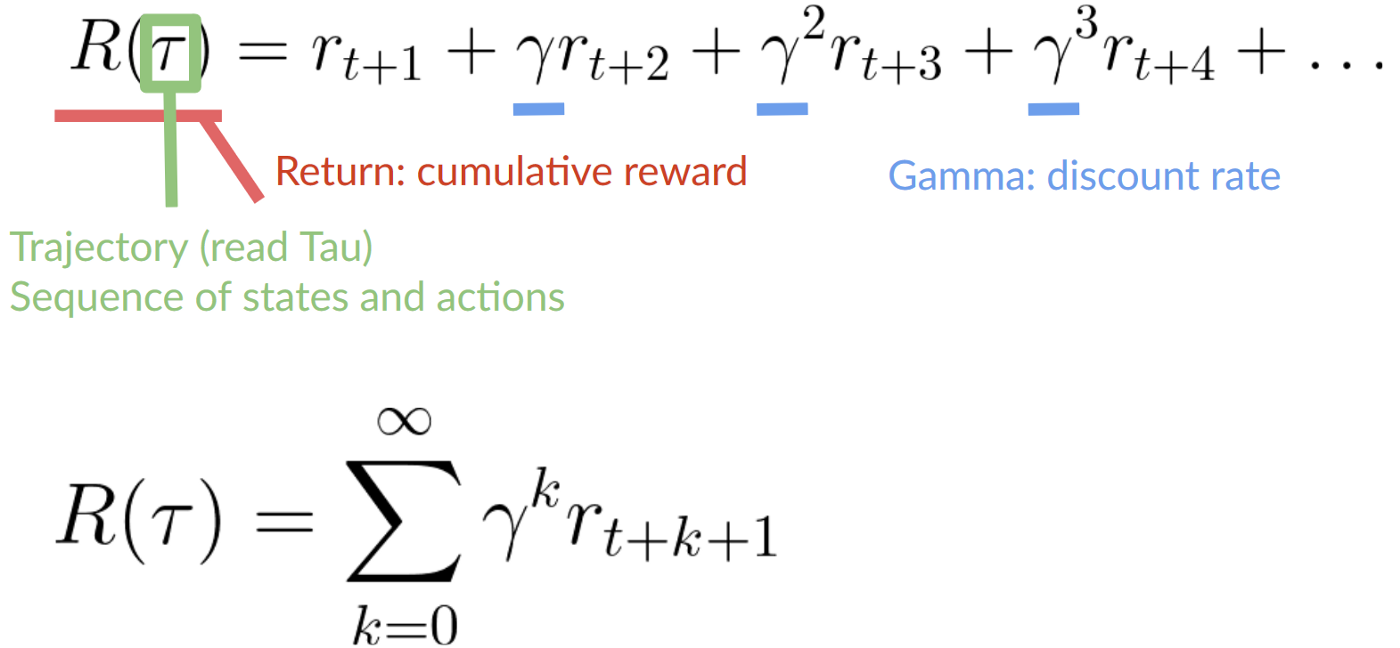

# 4. Task

**Eisode**: we have a starting point and an end point (a terminal state). This creates ab episode: a list of States, Actions, Rewards, and new States.

Ex. super Mario Bros: an episode begin at the launch of a new Mario Lvebel and ends when you are killed or you reached the end of the level.

**Continuing**: these tasks continus forever (no terminal state). The agent must learn how to choose the best actions and simultaneously interact with the environment.

Ex. automated stock trading. It is no starting point anf terminate state. the agent keeps running until we decide to stop it.

# 5. Exploration / Exploitation trade-off

**Exploration:** explore the environment by trying random actions in order to <font color = "red"> find more information</font> about the environment;

**Exploitation:** exploit known information to <font color = red>maximize the reward</font>.

Example

 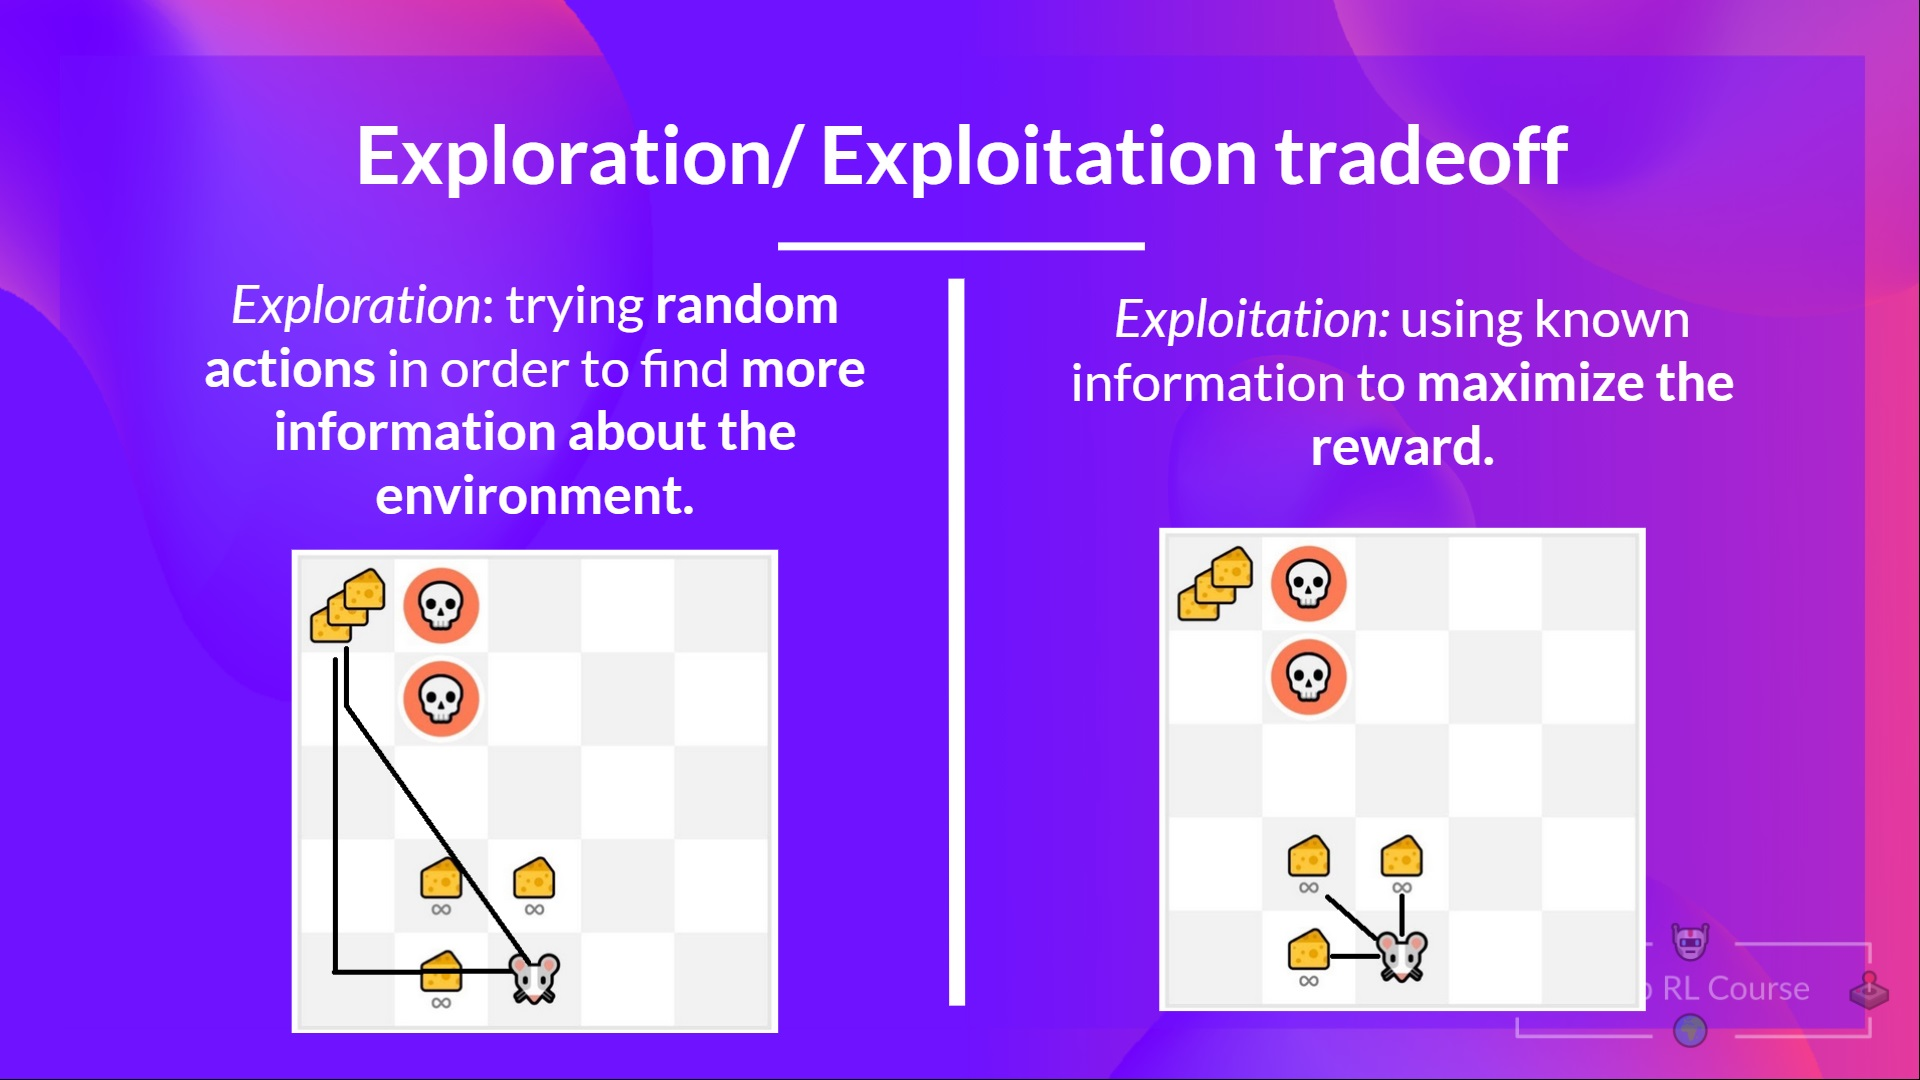

In this game, our mouse can have an infinite amount of small cheese (+1 each). But at the top of the maze, there is a gigantic sum of cheese (+1000).

However, if we only focus on **exploitation**, our agent will never reach the gigantic sum of cheese. Instead, it will only **exploit** the nearest source of rewards, even if this source is small (exploitation).

But if our agent does a little bit of **exploration**, it can discover the big reward (the pile of big cheese).

This is what we call the exploration/exploitation trade-off. We need to balance how much we explore the environment and how much we exploit what we know about the environment.

# 6. Policy $\pi:$ the agent's brain

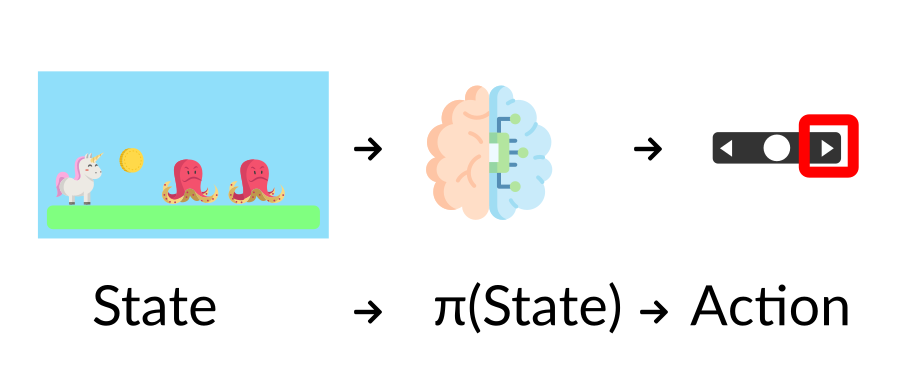

This Policy is the function we want to learn, our goal is to find the **optimal policy $\pi^*$**, the policy that maximizes expected return when the agent acts according to it. 

We find this $\pi^*$ through training.

There are two approaches to train our agent to find this optimal policy $\pi^*$:

* Directly, by teaching the agent to learn which action to take, given the current state: **_Policy-Based Methods_**.

* Indirectly, teach the agent to learn which state is more valuable and then take the action that leads to the more valuable states: **_Value-Based Methods_**.

## Policy-based methods

In Policy-Based methods, we learn a policy function directly.

The policy takes a state as input and outputs what actin to take at that state.

We have two types of policies:

* Determinstic: a policy at a given state will always return the same action.

$$a = \pi(s)$$

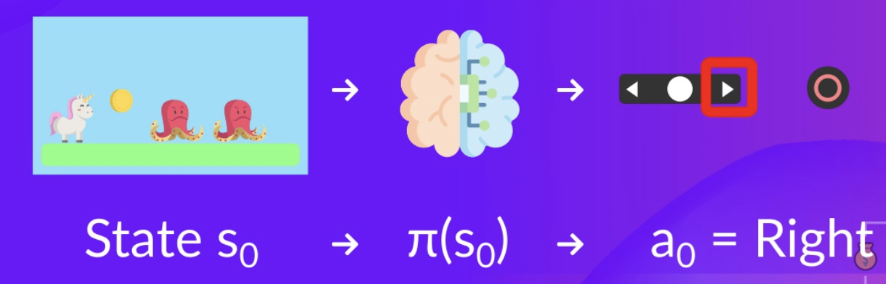


* Stochastic: outputs a probability distribution over actions.

$$\pi\left(a|s\right) = P\left(A|s\right)$$

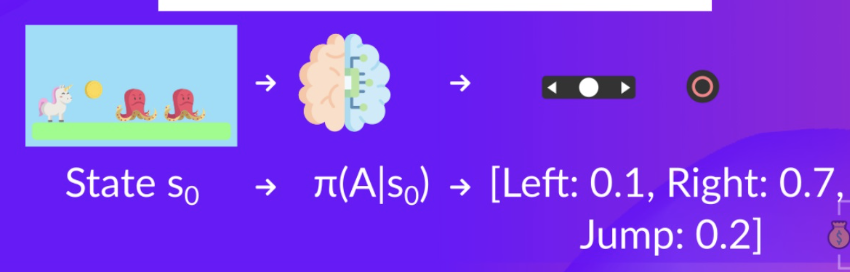

## Value-based methods

In value-based methods, instead of learning a policy function, we **learn a value function that maps a state to the expected value of being at that state**.

The value of a state is the expected discounted return the agent can get if it starts in that state, and then acts according to our policy.

“Act according to our policy” just means that our policy is “going to the state with the highest value”.

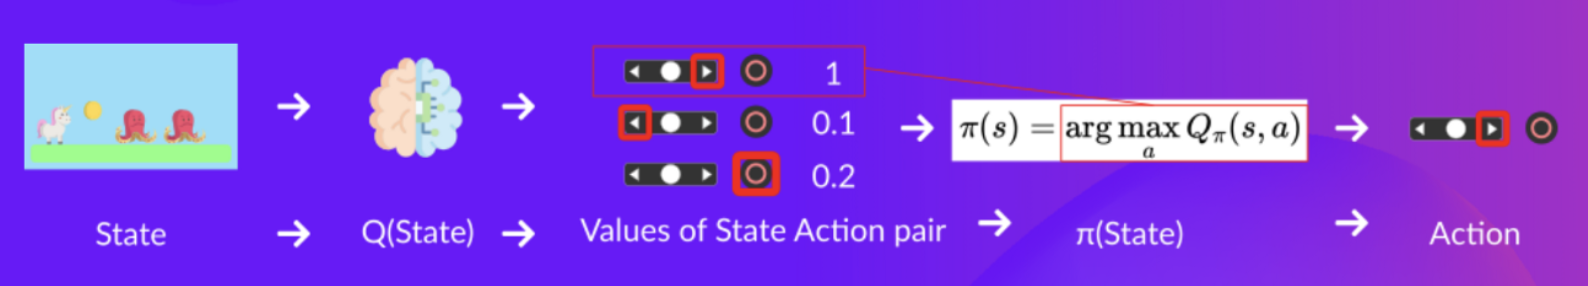

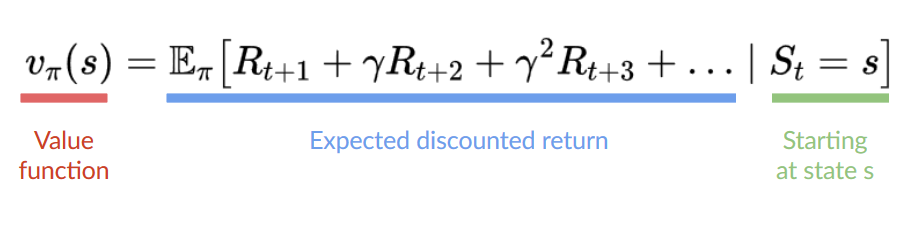

### So, the difference is:

* (policy-based training) the optimal policy $\pi^*$ is found by training the policy directly.
* (value-based training) finding an optimal value function ($Q^*$ or $V^*$) leads to having an optimal policy.

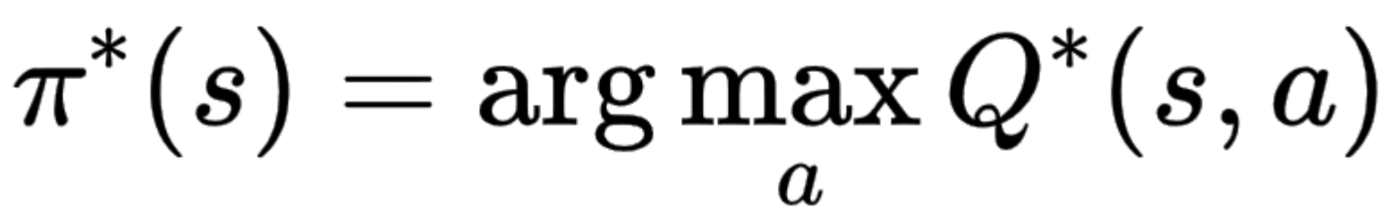

In value-based methods, we will use an **Eplison-Greddy Policy** that handles exploration/exploitation trade-off (in Q-learning).

### The state-value function

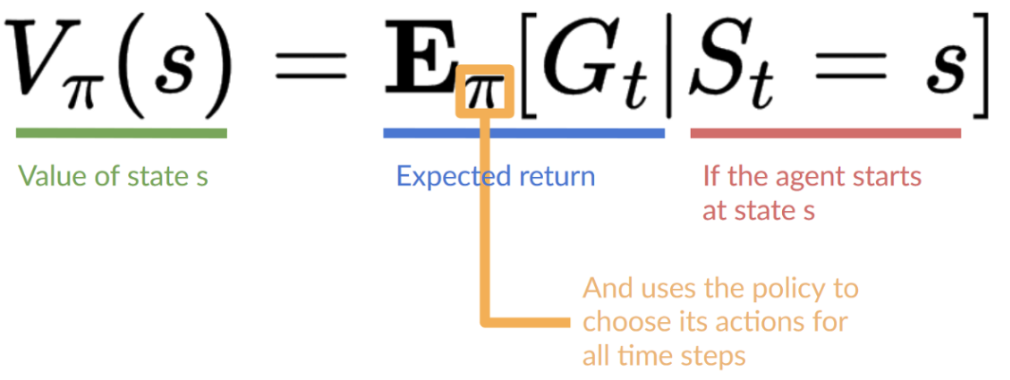

For each state, the state-value function outputs the **expected return** if the agent starts at that state and then follows the policy forever afterward (for all future timesteps, if you prefer).

### The action-value function

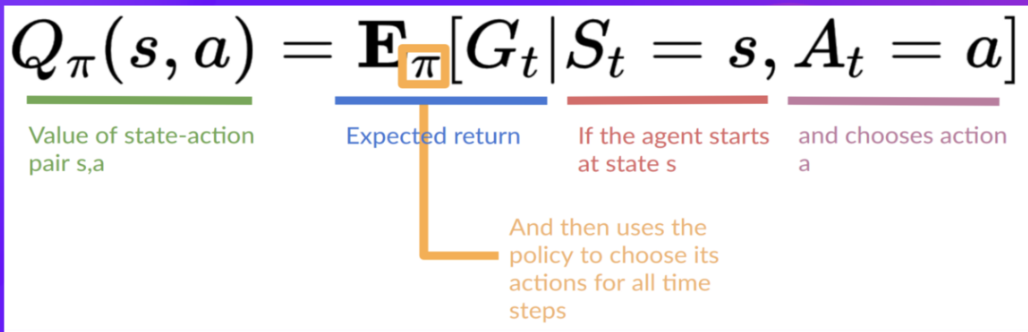

In the action-value function, for each state and action pair, the **action-value function** outputs the expected return if the agent starts in that state, takes that action, and then follows the policy forever after.

The problem is that to calaulate **each** value of a state or a state-action pair, we need to sum all the rewards an agent can get if it starts at that state.

This can be a **computationally expensive process**, and that's where the **Bellman equation** comes in to help us.

## The Bellman equation

With what we have learned so far, we know that if we calculate $V(S_t)$ (the value of a state), we need to calculate the return starting at that state and then follow the policy forever after.

So to calculate $V(S_t)$, we need to calaculate the sum of the expected rewards.
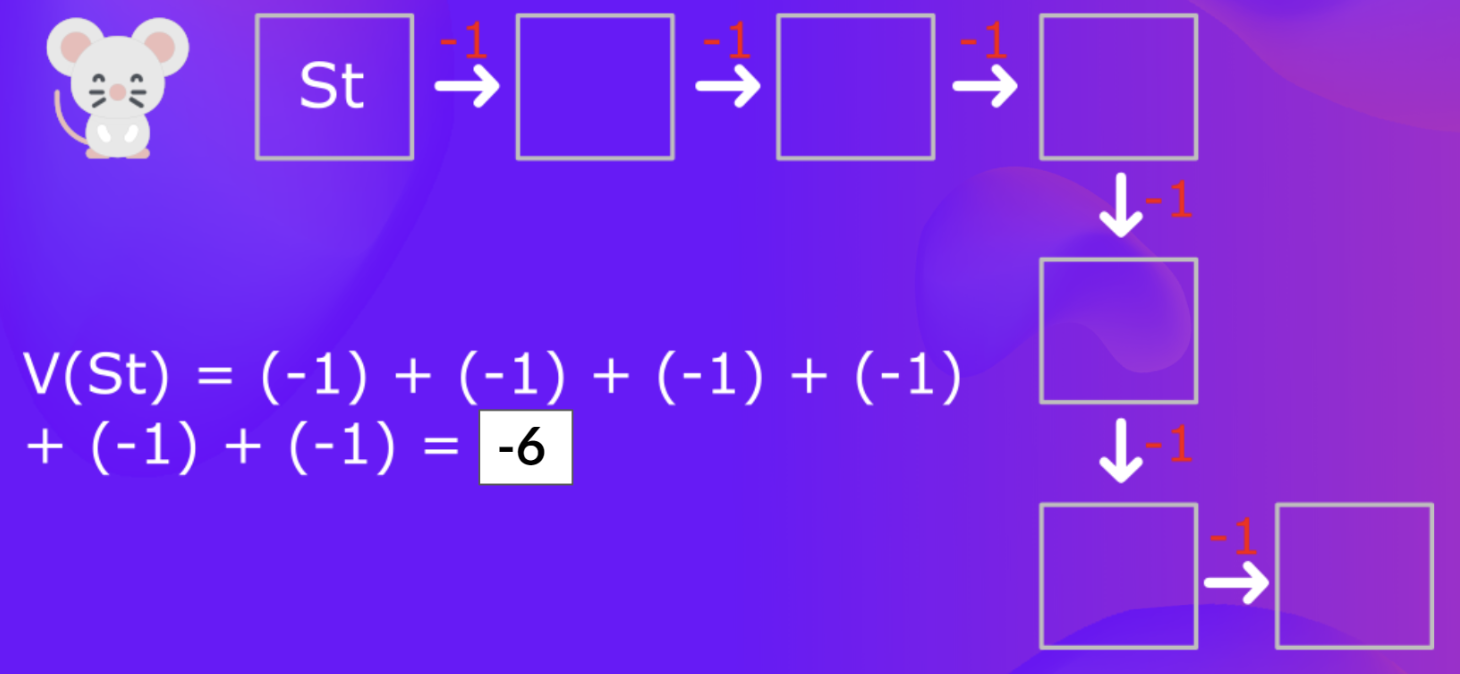
*To calculate the value of State 1: the sum of rewards if the agent started in that state and then followed the greedy policy (taking actions that leads to the best states values) for all the time steps*

Then, to calculate the $V(S_{t+1})$, we need to calculate the return starting at that state $S_{t+1}$.
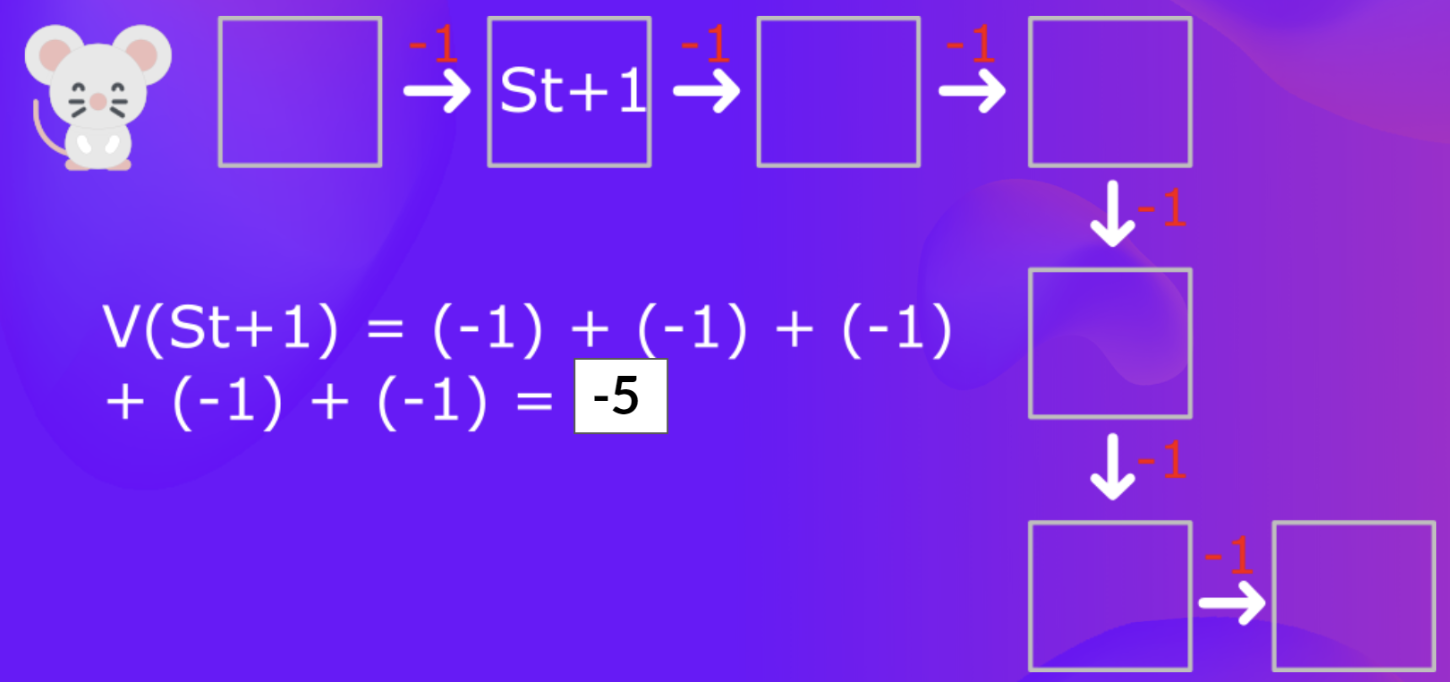
*To calculate the value of State 2: the sum of rewards if the agent started in that state, and then followed the policy for all the time steps*

We’re repeating the computation of the value of different states, which can be tedious if you need to do it for each state value or state-action value.

Instead of calculating the expected return for each state or each state-action pair, we can use the **Bellman equation**.

The Bellman equation is a recursive equation that works like this: instead of starting for each state from the beginning and calculating the return, we can consider the value of any state as:

  **The immediate reward $R_{t+1} +$ the discounted value of the state that follows $\gamma * V(S_{t+1})$.**

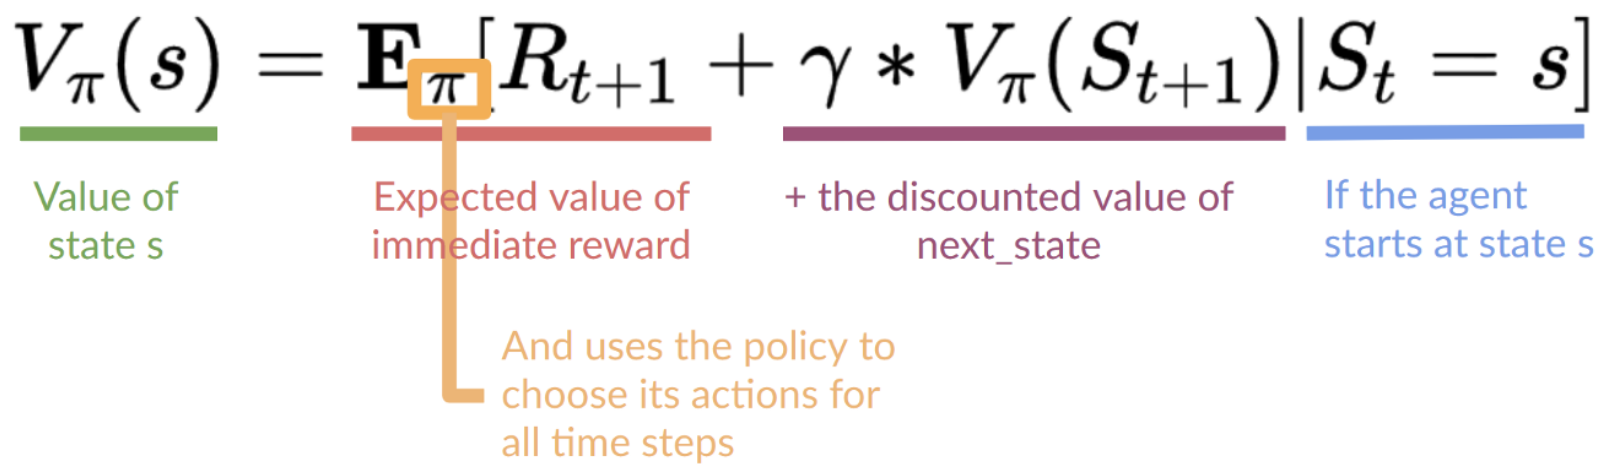

To calculate the value of State 1: the sum of rewards if the agent started in that state 1 and then followed the policy for all the time steps.

This is rquivalen to $V(S_t) = immediate reward R_{t+1} + Discounted valus of the next state \gamma * V(S_{t+1})$

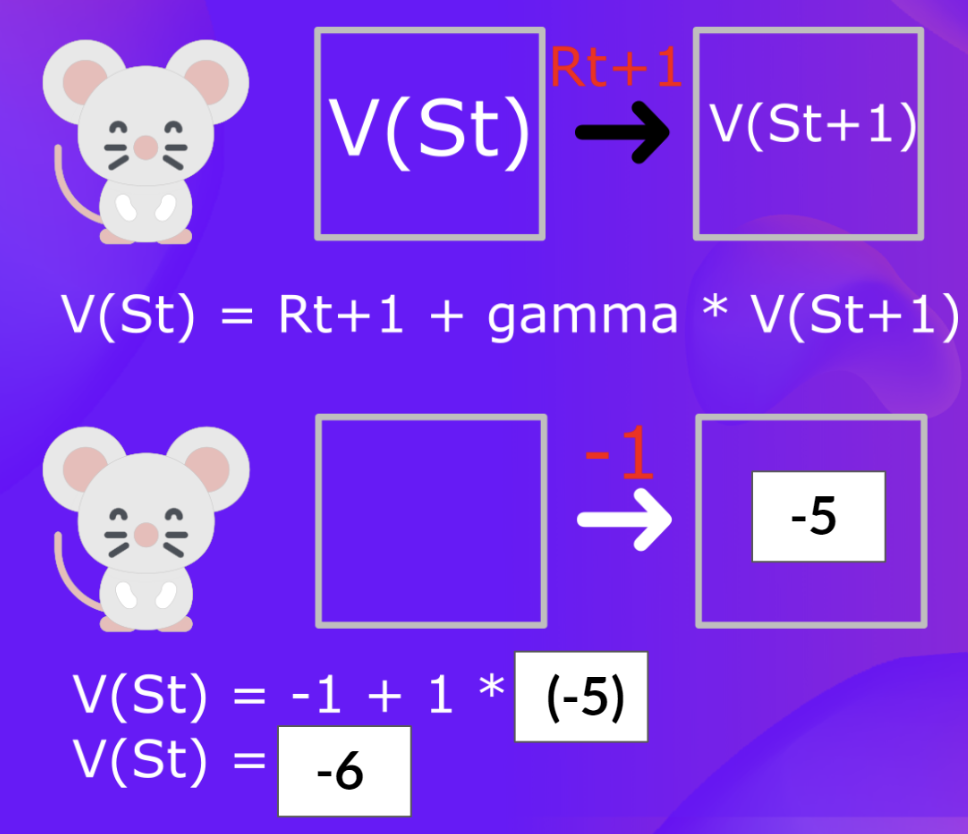

*For simplification, here we don’t discount so gamma = 1.*

The idea of the Bellman equation is that instead of calculating each value as the sum of the expected return, **which is a long process**, we calculate the value as **the sum of immediate reward + the discounted value of the state that follows**.